# A Quick Note

R is a programming language specifically designed for statistical computing and data visualization, making it popular among statisticians and researchers. Python, on the other hand, is a general-purpose programming language known for its readability, versatility, and extensive applications beyond data science, including web development, automation, and machine learning.

A key difference between the two is how they handle indexing. R uses 1-based indexing, meaning lists, vectors, and other sequences start counting from 1. In contrast, Python follows 0-based indexing, where the first element of a list or array is accessed at index 0. This can be a crucial distinction when translating code between the two languages or working with datasets across different platforms.

# Installing Packages

In [ ]:
!pip install pandas polars numpy scipy matplotlib seaborn patsy statsmodels stargazer

# Exploring Pandas
Pandas is a powerful Python library used for data manipulation and analysis. It provides two main data structures:

- DataFrame: A 2-dimensional table (similar to a spreadsheet or SQL table) that holds data in rows and columns, which can have different types (e.g., integers, floats, strings).
- Series: A one-dimensional array-like object that can store any data type.

Pandas is the primary Python library for data manipulation and analysis, offering powerful tools for working with tabular data (e.g., DataFrames). The power of Pandas lies in its ability to perform complex data filtering, transformation, and augmentation operations with ease and efficiency. It allows you to:

- Filter data based on conditions.
- Apply transformations across entire columns or rows.
- Merge and join datasets.
- Handle missing or duplicate values.

*GeoPandas extends Pandas to handle geospatial data, enabling operations on spatial objects like points and polygons, and integrating with other geospatial libraries.



#### Pandas Basics


In [1]:
import pandas as pd 

In [2]:
# Loading Data
# Pandas can load data from various sources and file formats. Here are the common types of data Pandas can load along with the corresponding commands:

# 1. CSV (Comma Separated Values)
# pd.read_csv('file.csv')

# 2. Excel (XLSX)
# pd.read_excel('file.xlsx')

# 3. JSON (JavaScript Object Notation)
# pd.read_json('file.json')

# 4. SQL (SQL Database)
# pd.read_sql(query, connection)  
# (where 'query' is a SQL query and 'connection' is a database connection object)

# 5. Parquet
# pd.read_parquet('file.parquet')

# 6. HDF5
# pd.read_hdf('file.h5')

# 7. HTML (Tables on a web page)
# pd.read_html('url_or_file.html')

# 8. Stata (Stata DTA file)
# pd.read_stata('file.dta')

# 9. SAS (SAS XPORT or SAS7BDAT file)
# pd.read_sas('file.sas7bdat')

# 10. Feather (Fast binary data format)
# pd.read_feather('file.feather')

# 11. Msgpack (deprecated as of pandas 1.0, but still usable)
# pd.read_msgpack('file.msg')

# 12. Pickle (Serialized Python objects)
# pd.read_pickle('file.pkl')

df = pd.read_csv('Data/AL_Residential.csv')
df

,year,month,state,residential,HDD_20
0,1989,1,AL,238.903226,10.141640
1,1989,2,AL,251.571429,11.763194
2,1989,3,AL,238.451613,7.031389
3,1989,4,AL,157.400000,5.424619
4,1989,5,AL,92.129032,2.375010
...,...,...,...,...,...
403,2022,8,AL,20.838710,0.024494
404,2022,9,AL,21.900000,1.049530
405,2022,10,AL,38.516129,5.110879
406,2022,11,AL,98.533333,7.823489


In [3]:
import sqlite3 
import pandas as pd

# Example using SQLite

# Create a link to the SQLite database
conn = sqlite3.connect('/home/ehartley/koa_scratch/pudl_test/pudl.sqlite')

# Create a table and insert data
df = pd.read_sql_query('SELECT * FROM core_eia923__monthly_generation', conn)

# Close the connection
conn.close()

df

,plant_id_eia,generator_id,report_date,net_generation_mwh,data_maturity
0,3,1,2008-01-01,96021.0,final
1,3,1,2008-02-01,79256.0,final
2,3,1,2008-03-01,91687.0,final
3,3,1,2008-04-01,73693.0,final
4,3,1,2008-05-01,68161.0,final
...,...,...,...,...,...
725297,65978,ST7,2024-08-01,228513.0,incremental_ytd
725298,65978,ST7,2024-09-01,224554.0,incremental_ytd
725299,65978,ST7,2024-10-01,209835.0,incremental_ytd
725300,65978,ST7,2024-11-01,208678.0,incremental_ytd


In [4]:
# Creating DataFrames
# DataFrames are two-dimensional, size-mutable, potentially heterogeneous tabular data structures with labeled axes (rows and columns).
# A DataFrame can be created from various data structures, including lists, dictionaries, and NumPy arrays.

# Create first DataFrame (df1)
df1 = pd.DataFrame({
    'employee_id': [1, 2, 3, 4],
    'department': ['HR', 'Finance', 'IT', 'Marketing']
})

# Create second DataFrame (df2)
df2 = pd.DataFrame({
    'employee_id': [2, 3, 4, 4],
    'salary': [50000, 60000, 70000, 75000]
})

# Merging DataFrames
# Merging DataFrames is a common operation in data analysis. It combines two DataFrames based on a common column (or index).
# The merge function in pandas allows you to perform different types of joins: inner, left, right, and outer.

# Inner Join: Returns only the rows that have common values in both DataFrames.
inner_join = pd.merge(df1, df2, on='employee_id', how='inner')
print("Inner Join:\n", inner_join)

# Left Join: Returns all rows from the left DataFrame and matched rows from the right DataFrame. If no match, NaN is returned.
left_join = pd.merge(df1, df2, on='employee_id', how='left')
print("\nLeft Join:\n", left_join)

# Right Join: Returns all rows from the right DataFrame and matched rows from the left DataFrame. If no match, NaN is returned.
right_join = pd.merge(df1, df2, on='employee_id', how='right')
print("\nRight Join:\n", right_join)

# Outer Join: Returns all rows from both DataFrames. If there is no match, NaN is returned.
outer_join = pd.merge(df1, df2, on='employee_id', how='outer')
print("\nOuter Join:\n", outer_join)

Inner Join:
    employee_id department  salary
0            2    Finance   50000
1            3         IT   60000
2            4  Marketing   70000
3            4  Marketing   75000

Left Join:
    employee_id department   salary
0            1         HR      NaN
1            2    Finance  50000.0
2            3         IT  60000.0
3            4  Marketing  70000.0
4            4  Marketing  75000.0

Right Join:
    employee_id department  salary
0            2    Finance   50000
1            3         IT   60000
2            4  Marketing   70000
3            4  Marketing   75000

Outer Join:
    employee_id department   salary
0            1         HR      NaN
1            2    Finance  50000.0
2            3         IT  60000.0
3            4  Marketing  70000.0
4            4  Marketing  75000.0


In [5]:
# Create DataFrame `ID` with different column name
ID = pd.DataFrame({
    'ID': [1, 2, 3, 4],
    'name': ['John', 'Jane', 'Jim', 'Jill']
})

# Create DataFrame `employee_id` with a different column name
employee_id = pd.DataFrame({
    'employee_id': [2, 3, 4, 4],
    'salary': [50000, 60000, 70000, 75000]
})

# 1. Merge using .rename(columns={}) to match column names
ID_renamed = ID.rename(columns={'ID': 'employee_id'})
merged_df_renamed = ID_renamed.merge(employee_id, on='employee_id', how='inner')

# 2. Merge using join without renaming columns (just joining based on different column names)=
merged_df_join = pd.merge(ID, employee_id, left_on='ID', right_on='employee_id', how='inner')

# Display both merged DataFrames
print("Merged using .rename(columns={}):")
print(merged_df_renamed)

print("\nMerged using join (without renaming columns):")
print(merged_df_join)

Merged using .rename(columns={}):
   employee_id  name  salary
0            2  Jane   50000
1            3   Jim   60000
2            4  Jill   70000
3            4  Jill   75000

Merged using join (without renaming columns):
   ID  name  employee_id  salary
0   2  Jane            2   50000
1   3   Jim            3   60000
2   4  Jill            4   70000
3   4  Jill            4   75000


In [6]:
df_merged = pd.merge(df1, df2, on='employee_id', how='left')

# Showing rows with missing values
df_merged[df_merged.isna().any(axis=1)]

,employee_id,department,salary
0,1,HR,NaN


In [7]:
# Showing duplicate rows based on a subset of columns
df_merged[df_merged.duplicated(subset=['employee_id', 'department'], keep=False)]

,employee_id,department,salary
3,4,Marketing,70000.0
4,4,Marketing,75000.0


### Using Pandas to Develop Consistent Data Ingestion Solutions

In [10]:
df = pd.read_excel('Data/small_scale_solar_2023.xlsx')
df.head()

,Estimated Small Scale Solar PV Capacity and Generation- Current Month,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,Capacity MW,NaN,NaN,NaN,Generation MWh,NaN,NaN,NaN
1,Year,Month,State,Data Status,Residential,Commercial,Industrial,Total,Residential,Commercial,Industrial,Total
2,2023,12,AK,Final,12.842,6.174,0.171,19.187,0,0,0,0
3,2023,12,AL,Final,4.081,9.808,1.884,15.773,403.333,964.045,190.842,1558.22
4,2023,12,AR,Final,142.658,83.983,23.817,250.458,14129.597,8251.11,2396.596,24777.303


In [11]:
# Indexing the dataframe to get the second row (recall python is 0-indexed)
df.loc[1].values

array(['Year', 'Month', 'State', 'Data Status', 'Residential',
       'Commercial', 'Industrial', 'Total', 'Residential', 'Commercial',
       'Industrial', 'Total'], dtype=object)

In [12]:
# Exploring the datatypes of the columns
df.dtypes

Estimated Small Scale Solar PV Capacity and Generation- Current Month    object
Unnamed: 1                                                               object
Unnamed: 2                                                               object
Unnamed: 3                                                               object
Unnamed: 4                                                               object
Unnamed: 5                                                               object
Unnamed: 6                                                               object
Unnamed: 7                                                               object
Unnamed: 8                                                               object
Unnamed: 9                                                               object
Unnamed: 10                                                              object
Unnamed: 11                                                              object
dtype: object

In [14]:
def process_df(path):
    """
    Process the Excel file to clean and structure the data.

    This function performs the following operations:
    1. Loads an Excel file into a pandas DataFrame.
    2. Drops rows with no relevant data (e.g., footers, empty rows).
    3. Retains data from the third row onward.
    4. Renames the columns to more descriptive names.
    5. Converts specified columns to numeric values, coercing any errors to NaN.
    6. Removes rows where the 'Year' column contains unwanted text (e.g., 'Year', 'Due', 'NM').

    Args:
        path (str or Path): The file path to the Excel file to be processed.

    Returns:
        pandas.DataFrame: The cleaned and structured DataFrame.

    """
    
    # Load the Excel file
    df = pd.read_excel(path, header=None)

    # Drop any rows that do not contain relevant data (like the footer or empty rows)
    df = df.dropna(how='all')

    # Reset index after dropping rows
    df.reset_index(drop=True, inplace=True)

    # Take the data from the third row onward
    df = df[2:]  

    # Reset index again
    df.reset_index(drop=True, inplace=True)

    # Rename columns to the specified names
    df.columns = [
        'Year', 'Month', 'State', 'Data Status',
        'Residential_MW', 'Commercial_MW', 'Industrial_MW', 'Total_MW',
        'Residential_MWh', 'Commercial_MWh', 'Industrial_MWh', 'Total_MWh'
    ]

    # Convert appropriate columns to numeric, handling errors for any non-numeric values
    cols_to_convert = [
        'Residential_MW', 'Commercial_MW', 'Industrial_MW', 'Total_MW',
        'Residential_MWh', 'Commercial_MWh', 'Industrial_MWh', 'Total_MWh'
    ]
    df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

    # Drop any rows where 'Year' is not a number or contains unwanted text
    df = df[~df['Year'].str.contains('Year|Due|NM', na=False)]  # The ability to cut data in this fashion and use things like the not operator '~' are exceptionally powerful tools 
    
    return df

df = process_df('/home/ehartley/envecon_koastore/Personal/ehartley/___EIA_Solar_Preds/small_scale_data/small_scale_solar_2023.xlsx')
df.head()

,Year,Month,State,Data Status,Residential_MW,Commercial_MW,Industrial_MW,Total_MW,Residential_MWh,Commercial_MWh,Industrial_MWh,Total_MWh
1,2023,12,AK,Final,12.842,6.174,0.171,19.187,0.000,0.000,0.000,0.000
2,2023,12,AL,Final,4.081,9.808,1.884,15.773,403.333,964.045,190.842,1558.220
3,2023,12,AR,Final,142.658,83.983,23.817,250.458,14129.597,8251.110,2396.596,24777.303
4,2023,12,AZ,Final,2097.186,575.177,7.280,2679.643,264822.623,80493.612,1073.656,346389.891
5,2023,12,CA,Final,11704.541,3222.797,1687.847,16615.185,1170366.680,346835.145,174026.123,1691227.948


### Using Vectorized Operations & More Efficient Big Data Packages: For Loops Are SLOW

Polars is a fast, memory-efficient DataFrame library designed for high-performance data processing. Unlike pandas, which is optimized for single-core performance, Polars leverages parallel execution and SIMD (Single Instruction, Multiple Data) to process data more efficiently, particularly when working with large datasets. Polars is built in Rust and designed to scale better with large datasets, offering both eager and lazy evaluation modes. (If you have experience with them, this is a similar approach to spark or hadoop.)

Key features of Polars:
- **Performance**: It outperforms pandas in many cases, especially with large data. The underlying implementation in Rust allows for faster execution of vectorized operations.
- **Lazy Evaluation**: Allows you to build up a query plan without executing it immediately, which can optimize the computation pipeline and reduce memory usage.
- **Parallelism**: Polars automatically utilizes multiple cores for computation, speeding up operations like groupby, join, and aggregations on large datasets.
- **Memory Efficiency**: It uses Arrow-based memory storage, reducing the memory footprint for large datasets.

Polars can be a great choice when dealing with large datasets or when you need to scale data processing tasks beyond what pandas can handle efficiently.

In [15]:
import polars as pl

df = pl.scan_parquet('/home/ehartley/envecon_koastore/Personal/ehartley/ECN 637 Project/Data_Processing_Python/Processed_Data_2000_2022.parquet')
df

<LazyFrame [285 cols, {"fips": Int64 … "HDD_Clim_HI_23": Float64}] at 0x14B8989602D0>

In [16]:
# Show the columns of the DataFrame
df.columns

['fips',
 'dateNum',
 'tMin',
 'tMax',
 'prec',
 'Avg_Temp',
 'Clim_Avg_Temp',
 'Clim_CDD_18',
 'Clim_HDD_18',
 'Avg_Clim_Avg_Temp',
 'CDD_14',
 'CDD_15',
 'CDD_16',
 'CDD_17',
 'CDD_18',
 'CDD_19',
 'CDD_20',
 'CDD_21',
 'CDD_22',
 'HDD_14',
 'HDD_15',
 'HDD_16',
 'HDD_17',
 'HDD_18',
 'HDD_19',
 'HDD_20',
 'HDD_21',
 'HDD_22',
 'CDD_Clim_CDD_14',
 'CDD_Clim_CDD_15',
 'CDD_Clim_CDD_16',
 'CDD_Clim_CDD_17',
 'CDD_Clim_CDD_18',
 'CDD_Clim_CDD_19',
 'CDD_Clim_CDD_20',
 'CDD_Clim_CDD_21',
 'CDD_Clim_CDD_22',
 'CDD_Clim_HDD_14',
 'CDD_Clim_HDD_15',
 'CDD_Clim_HDD_16',
 'CDD_Clim_HDD_17',
 'CDD_Clim_HDD_18',
 'CDD_Clim_HDD_19',
 'CDD_Clim_HDD_20',
 'CDD_Clim_HDD_21',
 'CDD_Clim_HDD_22',
 'HDD_Clim_CDD_14',
 'HDD_Clim_CDD_15',
 'HDD_Clim_CDD_16',
 'HDD_Clim_CDD_17',
 'HDD_Clim_CDD_18',
 'HDD_Clim_CDD_19',
 'HDD_Clim_CDD_20',
 'HDD_Clim_CDD_21',
 'HDD_Clim_CDD_22',
 'HDD_Clim_HDD_14',
 'HDD_Clim_HDD_15',
 'HDD_Clim_HDD_16',
 'HDD_Clim_HDD_17',
 'HDD_Clim_HDD_18',
 'HDD_Clim_HDD_19',
 'HDD_Cli

In [17]:
# Select relevant columns from the DataFrame: fips (county code), dateNum, Avg_Temp, and HDD_20 (Heating Degree Days)
df_filt = df.select(
    [
        pl.col('fips'),
        pl.col('dateNum'),
        pl.col('Avg_Temp'),
        pl.col('HDD_20')
    ]
)

# Load the population data for each county from a CSV file
county_pops = pl.scan_csv('/home/ehartley/envecon_koastore/PRISM/prismGridPopulation.csv')

# Group the population data by 'fips' (county code) and calculate the sum of populations for each county
county_pops = county_pops.groupby('fips').agg(pl.col('pop').sum().alias('sum_pop'))

# Join the temperature and degree day data with the population data on the 'fips' column
df_new = df_filt.join(county_pops, on='fips')

# Add two new columns:
# 'stfips': State FIPS code, derived by integer division of the fips code by 1000 (first two digits)
# 'year_month': The year and month in string format (e.g., '2022-06') extracted from 'dateNum'
df_new = df_new.with_columns(
    stfips = pl.col('fips') // 1000,
    year_month = pl.col('dateNum').cast(str).str.slice(0, 7)
)

# Specify the columns to use for calculating weighted averages: 'Avg_Temp' and 'HDD_20'
columns = ['Avg_Temp', 'HDD_20']

# Calculate the weighted average of 'Avg_Temp' and 'HDD_20' using the population as weights
weighted_average = (pl.col(columns) * pl.col("sum_pop")).sum() / pl.col("sum_pop").sum()

# Group the data by state FIPS ('stfips') and date number ('dateNum'), 
# and calculate the weighted average for the specified columns
df_state_month = df_new.groupby(["stfips", "dateNum"]).agg(weighted_average).collect()

# Output the final DataFrame with the grouped and aggregated data
df_state_month

/tmp/ipykernel_4039003/1118661315.py:15: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  county_pops = county_pops.groupby('fips').agg(pl.col('pop').sum().alias('sum_pop'))
/tmp/ipykernel_4039003/1118661315.py:36: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  df_state_month = df_new.groupby(["stfips", "dateNum"]).agg(weighted_average).collect()


stfips,dateNum,Avg_Temp,HDD_20
i64,datetime[ns],f64,f64
23,2007-09-02 00:00:00,14.76373,5.604125
48,2000-10-05 00:00:00,27.053755,0.16057
17,2008-11-14 00:00:00,9.291369,10.708631
44,2008-12-31 00:00:00,-3.279562,23.279562
44,2012-12-03 00:00:00,8.967642,11.032358
…,…,…,…
21,2022-04-25 00:00:00,22.644825,0.699802
54,2020-11-25 00:00:00,4.161458,15.838542
41,2012-12-09 00:00:00,5.060602,14.939398


### Practical Example: Predicting Natural Gas Demand

In [4]:
import os 
import re
import numpy as np
import pandas as pd
import polars as pl 

from patsy import dmatrix
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer, LineLocation

In [5]:
all_files = os.listdir('Data')
all_files

['NM_Residential.csv',
 'KY_Residential.csv',
 'small_scale_solar_2023.xlsx',
 'CA_Residential.csv',
 'WI_Residential.csv',
 'AL_Residential.csv']

In [6]:
all_dfs = []

for file in all_files:
    if '.csv' in file: 
        df_temp = pd.read_csv(f'Data/{file}') # f-string 
        all_dfs.append(df_temp)
    else:
        print(f"File {file} is not a CSV file.")

df = pd.concat(all_dfs).reset_index(drop = True)
df['log_residential'] = np.log(df['residential'])
df

File small_scale_solar_2023.xlsx is not a CSV file.


,year,month,state,residential,HDD_20,log_residential
0,1989,1,NM,181.387097,18.558140,5.200633
1,1989,2,NM,167.714286,15.573355,5.122262
2,1989,3,NM,107.903226,10.191154,4.681235
3,1989,4,NM,65.333333,6.605651,4.179502
4,1989,5,NM,35.838710,4.167347,3.579029
...,...,...,...,...,...,...
2035,2022,8,AL,20.838710,0.024494,3.036812
2036,2022,9,AL,21.900000,1.049530,3.086487
2037,2022,10,AL,38.516129,5.110879,3.651077
2038,2022,11,AL,98.533333,7.823489,4.590395


/tmp/ipykernel_4146650/1155016615.py:29: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


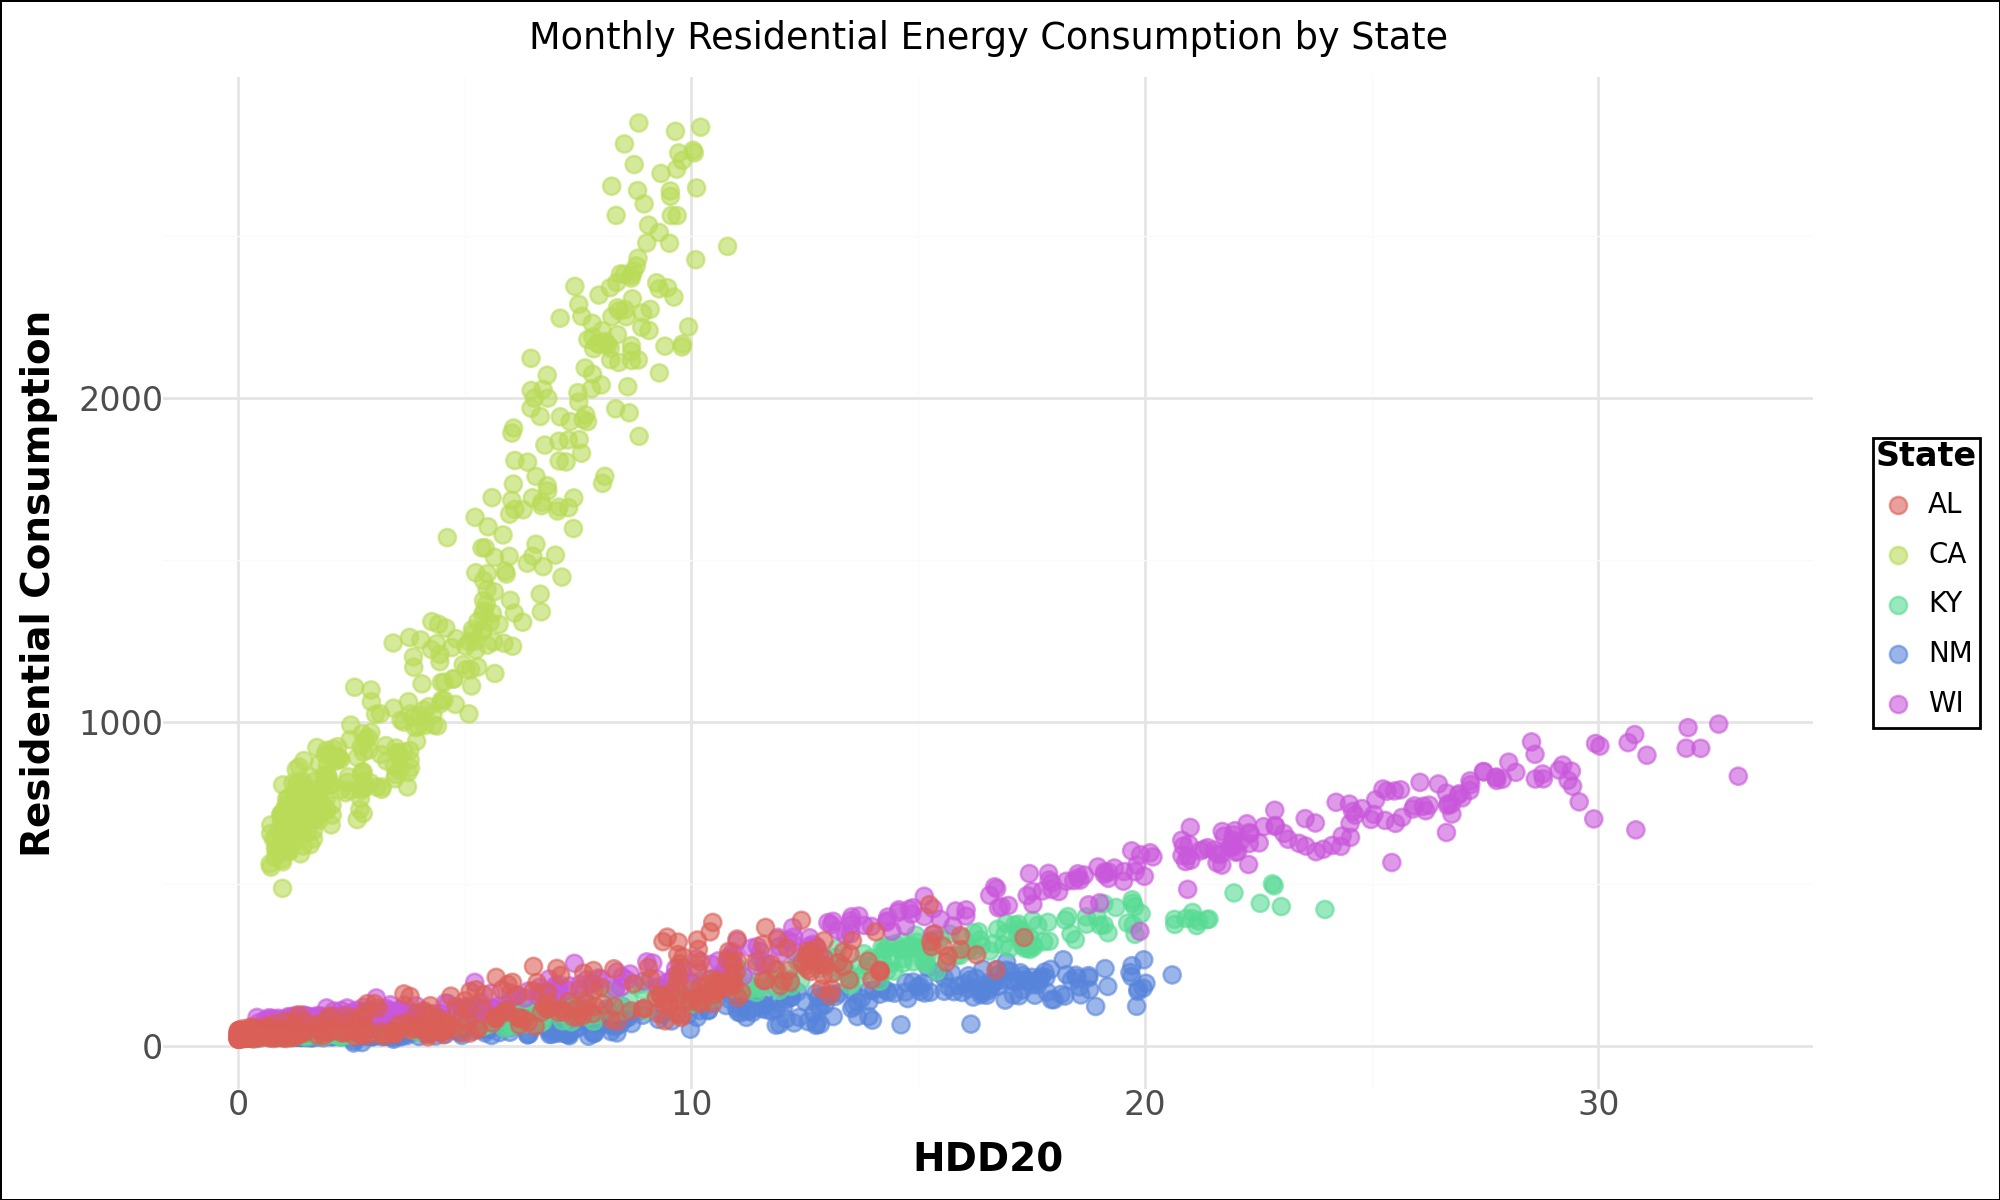

In [10]:
# Using R Style plotting in Python 
from plotnine import (
    ggplot, aes, geom_point, theme, element_text, element_rect, 
    labs, scale_color_manual, theme_minimal
)

# Define custom plot theme
custom_theme = theme(
    panel_background=element_rect(fill="white"),
    plot_background=element_rect(fill="white"),
    legend_background=element_rect(fill="white"),
    legend_title=element_text(size=12, weight='bold'),
    legend_text=element_text(size=10),
    axis_title=element_text(size=14, weight='bold'),
    axis_text=element_text(size=12),
    figure_size=(10, 6)  # Set larger figure size
)

# Create the scatter plot
plot = (ggplot(df, aes(x='HDD_20', y='residential', color='state')) +
        geom_point(alpha=0.6, size=3) +  # Adjust transparency and point size
        labs(title="Monthly Residential Energy Consumption by State",
             x="HDD20",
             y="Residential Consumption",
             color="State") +
        theme_minimal() +  # Minimal theme for cleaner look
        custom_theme)

print(plot)


In [4]:
# Group by state and calculate summary statistics for 'residential' and 'HDD_20'
df_summary = df.groupby('state')[['residential', 'HDD_20']].describe()
df_summary

residential                                                   \
            count         mean         std         min         25%   
state                                                                
AL          408.0   111.915444   94.164789   19.483871   38.153226   
CA          408.0  1325.253210  642.522179  485.741935  779.010484   
KY          408.0   153.032213  129.080292   21.967742   38.875806   
NM          408.0    91.760392   67.834121    7.966667   31.645161   
WI          408.0   364.056351  268.618420   68.516129  102.800000   

                                             HDD_20                       \
               50%          75%          max  count       mean       std   
state                                                                      
AL       68.583333   173.201613   435.161290  408.0   5.194780  4.811508   
CA     1067.563978  1874.816071  2850.258065  408.0   4.580527  2.872789   
KY       98.838710   266.838710   499.580645  408.0   8.007214  6.774917   
NM       63.676882   153.040323   265.225806  408.0   8.523917  6.162685   
WI      285.312903   602.169355   993.193548  408.0  12.922560  9.530654   

                                                            
            min       25%        50%        75%        max  
state                                                       
AL     0.002594  0.444652   4.109249   9.670654  17.333793  
CA     0.704757  1.761159   4.160585   7.087405  10.796431  
KY     0.061393  1.265766   6.515757  14.257647  23.970000  
NM     0.508834  2.413640   7.639095  13.998468  20.600700  
WI     0.419877  3.353641  11.486859  21.610992  33.084919

In [5]:
# Print summary state to a LaTeX table
print(df_summary.to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrrrrrrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{residential} & \multicolumn{8}{r}{HDD_20} \\
 & count & mean & std & min & 25% & 50% & 75% & max & count & mean & std & min & 25% & 50% & 75% & max \\
state &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
AL & 408.00 & 111.92 & 94.16 & 19.48 & 38.15 & 68.58 & 173.20 & 435.16 & 408.00 & 5.19 & 4.81 & 0.00 & 0.44 & 4.11 & 9.67 & 17.33 \\
CA & 408.00 & 1325.25 & 642.52 & 485.74 & 779.01 & 1067.56 & 1874.82 & 2850.26 & 408.00 & 4.58 & 2.87 & 0.70 & 1.76 & 4.16 & 7.09 & 10.80 \\
KY & 408.00 & 153.03 & 129.08 & 21.97 & 38.88 & 98.84 & 266.84 & 499.58 & 408.00 & 8.01 & 6.77 & 0.06 & 1.27 & 6.52 & 14.26 & 23.97 \\
NM & 408.00 & 91.76 & 67.83 & 7.97 & 31.65 & 63.68 & 153.04 & 265.23 & 408.00 & 8.52 & 6.16 & 0.51 & 2.41 & 7.64 & 14.00 & 20.60 \\
WI & 408.00 & 364.06 & 268.62 & 68.52 & 102.80 & 285.31 & 602.17 & 993.19 & 408.00 & 12.92 & 9.53 & 0.42 & 3.35 & 11.49 & 21.61 & 33.08 \\
\bottomrule
\end{tabular}



In [6]:
# Print summary state to a LaTeX table with custom formatting
# Format the LaTeX table
latex_table = """
\\begin{table}[H]
    \\caption{Summary Statistics by State}
    \\centering
    \\resizebox{\\textwidth}{!}{
    \\begin{threeparttable}
    \\begin{tabular}{lcccccccccccc}
    \\toprule
    & \\multicolumn{8}{c}{residential} & \\multicolumn{8}{c}{HDD\_20} \\\\
    \\cmidrule(lr){2-9} \\cmidrule(lr){10-17}
    state & count & mean & std & min & 25\% & 50\% & 75\% & max & count & mean & std & min & 25\% & 50\% & 75\% & max \\\\
    \\midrule
"""

# Loop through each row to add the statistics for each state
for idx, row in df_summary.iterrows():
    # Create a row with the state and the corresponding statistics for residential and HDD_20
    latex_table += f"    {idx} & " + " & ".join([f"{round(x, 2):.2f}" for x in row[0:8]]) + " & " + " & ".join([f"{round(x, 2):.2f}" for x in row[8:]]) + " \\\\ \n"

# Close the table format
latex_table += """
    \\bottomrule
    \\end{tabular}
    \\begin{tablenotes}[flushleft]
            \\footnotesize
            \\textit{Notes:} Summary statistics (count, mean, std, etc.) for `residential` and `HDD_20` by state.
    \\end{tablenotes}
    \\end{threeparttable}
    } 
    \\label{tab:state_summary}
\\end{table}
"""

# Print the LaTeX table
print(latex_table)


\begin{table}[H]
    \caption{Summary Statistics by State}
    \centering
    \resizebox{\textwidth}{!}{
    \begin{threeparttable}
    \begin{tabular}{lcccccccccccc}
    \toprule
    & \multicolumn{8}{c}{residential} & \multicolumn{8}{c}{HDD\_20} \\
    \cmidrule(lr){2-9} \cmidrule(lr){10-17}
    state & count & mean & std & min & 25\% & 50\% & 75\% & max & count & mean & std & min & 25\% & 50\% & 75\% & max \\
    \midrule
    AL & 408.00 & 111.92 & 94.16 & 19.48 & 38.15 & 68.58 & 173.20 & 435.16 & 408.00 & 5.19 & 4.81 & 0.00 & 0.44 & 4.11 & 9.67 & 17.33 \\ 
    CA & 408.00 & 1325.25 & 642.52 & 485.74 & 779.01 & 1067.56 & 1874.82 & 2850.26 & 408.00 & 4.58 & 2.87 & 0.70 & 1.76 & 4.16 & 7.09 & 10.80 \\ 
    KY & 408.00 & 153.03 & 129.08 & 21.97 & 38.88 & 98.84 & 266.84 & 499.58 & 408.00 & 8.01 & 6.77 & 0.06 & 1.27 & 6.52 & 14.26 & 23.97 \\ 
    NM & 408.00 & 91.76 & 67.83 & 7.97 & 31.65 & 63.68 & 153.04 & 265.23 & 408.00 & 8.52 & 6.16 & 0.51 & 2.41 & 7.64 & 14.00 & 20.60 \\ 
    WI & 

In [7]:
# Filter the df to look at a single state
df_NM = df[df['state'] == 'NM']
df_NM

,year,month,state,residential,HDD_20,log_residential
0,1989,1,NM,181.387097,18.558140,5.200633
1,1989,2,NM,167.714286,15.573355,5.122262
2,1989,3,NM,107.903226,10.191154,4.681235
3,1989,4,NM,65.333333,6.605651,4.179502
4,1989,5,NM,35.838710,4.167347,3.579029
...,...,...,...,...,...,...
403,2022,8,NM,30.870968,0.913051,3.429816
404,2022,9,NM,27.000000,2.033279,3.295837
405,2022,10,NM,54.161290,7.461242,3.991966
406,2022,11,NM,167.933333,15.038542,5.123567


### Fixed Effects Regression
$y_t = \beta + \beta_{1} W_{t} + \gamma_{month} + \alpha_{year}$

### Flexible Trends Regression
$y_t = \beta + \beta_{1} W_{t} + c(month) + s(year)$

- $c(month) = \eta + \eta_1 \cdot month_1 + \eta_2 \cdot month_2 + ... + \eta_n \cdot month_n$ where $n = df$
- $s(year) = \nu + \nu_1 \cdot year_1 + \nu_2 \cdot year_2 + ... + \nu_j \cdot year_j$ where $j = df$

In [8]:
def create_ns_basis(data, column, deg_free):
    x = data[column]
    cyclic_basis_mat = dmatrix(f'cr(x, df={deg_free}) - 1', {'x': x})
    column_names = cyclic_basis_mat.design_info.column_names
    new_column_names = [f'{column}_{i}' for i in range(len(column_names))]
    cyclic_basis_mat = pd.DataFrame(np.array(cyclic_basis_mat), columns=new_column_names)
    data_reset_index = data.reset_index(drop=True)
    data = pd.concat([data_reset_index, cyclic_basis_mat], axis=1)
    spline_cols = [f'{column}_{i}' for i in range(deg_free)]
    return data, spline_cols

#### Brief Interjection: Using Copilot/LLMs for documentation

recreate the create_ns_basis function but add a docstring and inline comments on operations 

In [9]:
df_NM, ns_year_cols = create_ns_basis(df_NM, 'year', 34)
df_NM, ns_month_cols = create_ns_basis(df_NM, 'month', 12)
df_NM

,year,month,state,residential,HDD_20,log_residential,year_0,year_1,year_2,year_3,...,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11
0,1989,1,NM,181.387097,18.558140,5.200633,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1989,2,NM,167.714286,15.573355,5.122262,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1989,3,NM,107.903226,10.191154,4.681235,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1989,4,NM,65.333333,6.605651,4.179502,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1989,5,NM,35.838710,4.167347,3.579029,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2022,8,NM,30.870968,0.913051,3.429816,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
404,2022,9,NM,27.000000,2.033279,3.295837,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
405,2022,10,NM,54.161290,7.461242,3.991966,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
406,2022,11,NM,167.933333,15.038542,5.123567,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Exploring Statsmodels

In [10]:
help(smf.ols)

Help on method from_formula in module statsmodels.base.model:

from_formula(formula, data, subset=None, drop_cols=None, *args, **kwargs) method of builtins.type instance
    Create a Model from a formula and dataframe.
    
    Parameters
    ----------
    formula : str or generic Formula object
        The formula specifying the model.
    data : array_like
        The data for the model. See Notes.
    subset : array_like
        An array-like object of booleans, integers, or index values that
        indicate the subset of df to use in the model. Assumes df is a
        `pandas.DataFrame`.
    drop_cols : array_like
        Columns to drop from the design matrix.  Cannot be used to
        drop terms involving categoricals.
    *args
        Additional positional argument that are passed to the model.
    **kwargs
        These are passed to the model with one exception. The
        ``eval_env`` keyword is passed to patsy. It can be either a
        :class:`patsy:patsy.EvalEnvironm

In [11]:
import inspect

# Retrieve the source code of the ols function
# This can be used to search the source code quickly 
print(inspect.getsource(smf.ols))

    @classmethod
    def from_formula(cls, formula, data, subset=None, drop_cols=None,
                     *args, **kwargs):
        """
        Create a Model from a formula and dataframe.

        Parameters
        ----------
        formula : str or generic Formula object
            The formula specifying the model.
        data : array_like
            The data for the model. See Notes.
        subset : array_like
            An array-like object of booleans, integers, or index values that
            indicate the subset of df to use in the model. Assumes df is a
            `pandas.DataFrame`.
        drop_cols : array_like
            Columns to drop from the design matrix.  Cannot be used to
            drop terms involving categoricals.
        *args
            Additional positional argument that are passed to the model.
        **kwargs
            These are passed to the model with one exception. The
            ``eval_env`` keyword is passed to patsy. It can be either a


In [13]:
# This also works on functions you have created 
print(inspect.getsource(create_ns_basis))

def create_ns_basis(data, column, deg_free):
    x = data[column]
    cyclic_basis_mat = dmatrix(f'cr(x, df={deg_free}) - 1', {'x': x})
    column_names = cyclic_basis_mat.design_info.column_names
    new_column_names = [f'{column}_{i}' for i in range(len(column_names))]
    cyclic_basis_mat = pd.DataFrame(np.array(cyclic_basis_mat), columns=new_column_names)
    data_reset_index = data.reset_index(drop=True)
    data = pd.concat([data_reset_index, cyclic_basis_mat], axis=1)
    spline_cols = [f'{column}_{i}' for i in range(deg_free)]
    return data, spline_cols



In [14]:
# Define the variable to be included in the models
variable = 'HDD_20'

# Create the formula for the spline model (with natural splines for year and month)
formula_splines = f'log_residential ~ {variable} + ' + ' + '.join(ns_year_cols) + ' + ' + ' + '.join(ns_month_cols)

# Create the formula for the fixed effects model (with year and month as categorical variables)
formula_FE = f'log_residential ~ {variable} + C(year) + C(month)'

# Fit the OLS regression with natural splines
reg_splines = smf.ols(formula_splines, data=df_NM).fit()

# Fit the OLS regression with fixed effects for year and month
reg_FE = smf.ols(formula_FE, data=df_NM).fit()

# Initialize Stargazer for output formatting and add both regression results to the table
stargazer = Stargazer([reg_splines, reg_FE])

# Set the significance level for the results in the table (extremely small value for maximum significance)
stargazer.significance_levels([1e-10000000, 1e-10000000, 1e-10000000])

# Hide the degrees of freedom in the output table
stargazer.show_degrees_of_freedom(False)

# Set the covariate order to display the variable first in the table
stargazer.covariate_order([variable])

# Add custom lines to the output table with specific headers for model specifications
stargazer.add_line('Month Fixed Effects', ['', 'X'], LineLocation.FOOTER_TOP)
stargazer.add_line('Seasonal Spline', ['X', ''], LineLocation.FOOTER_TOP)
stargazer.add_line('Year Fixed Effects', ['', 'X'], LineLocation.FOOTER_TOP)
stargazer.add_line('Long Run Spline', ['X', ''], LineLocation.FOOTER_TOP)

# Display the formatted regression results table
stargazer


In [15]:
# Render a LaTex version of the table
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lcc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{2}{c}{\textit{Dependent variable: log_residential}} \
\cr \cline{2-3}
\\[-1.8ex] & (1) & (2) \\
\hline \\[-1.8ex]
 HDD_20 & 0.050$^{}$ & 0.050$^{}$ \\
& (0.011) & (0.011) \\
\hline \\[-1.8ex]
 Month Fixed Effects &  & X \\
 Seasonal Spline & X &  \\
 Year Fixed Effects &  & X \\
 Long Run Spline & X &  \\
 Observations & 408 & 408 \\
 $R^2$ & 0.940 & 0.940 \\
 Adjusted $R^2$ & 0.933 & 0.933 \\
 Residual Std. Error & 0.204 & 0.204 \\
 F Statistic & 126.439$^{}$ & 126.439$^{}$ \\
\hline
\hline \\[-1.8ex]
\textit{Note:} & \multicolumn{2}{r}{$^{***}$p$<$0.0; $^{***}$p$<$0.0; $^{***}$p$<$0.0} \\
\end{tabular}
\end{table}


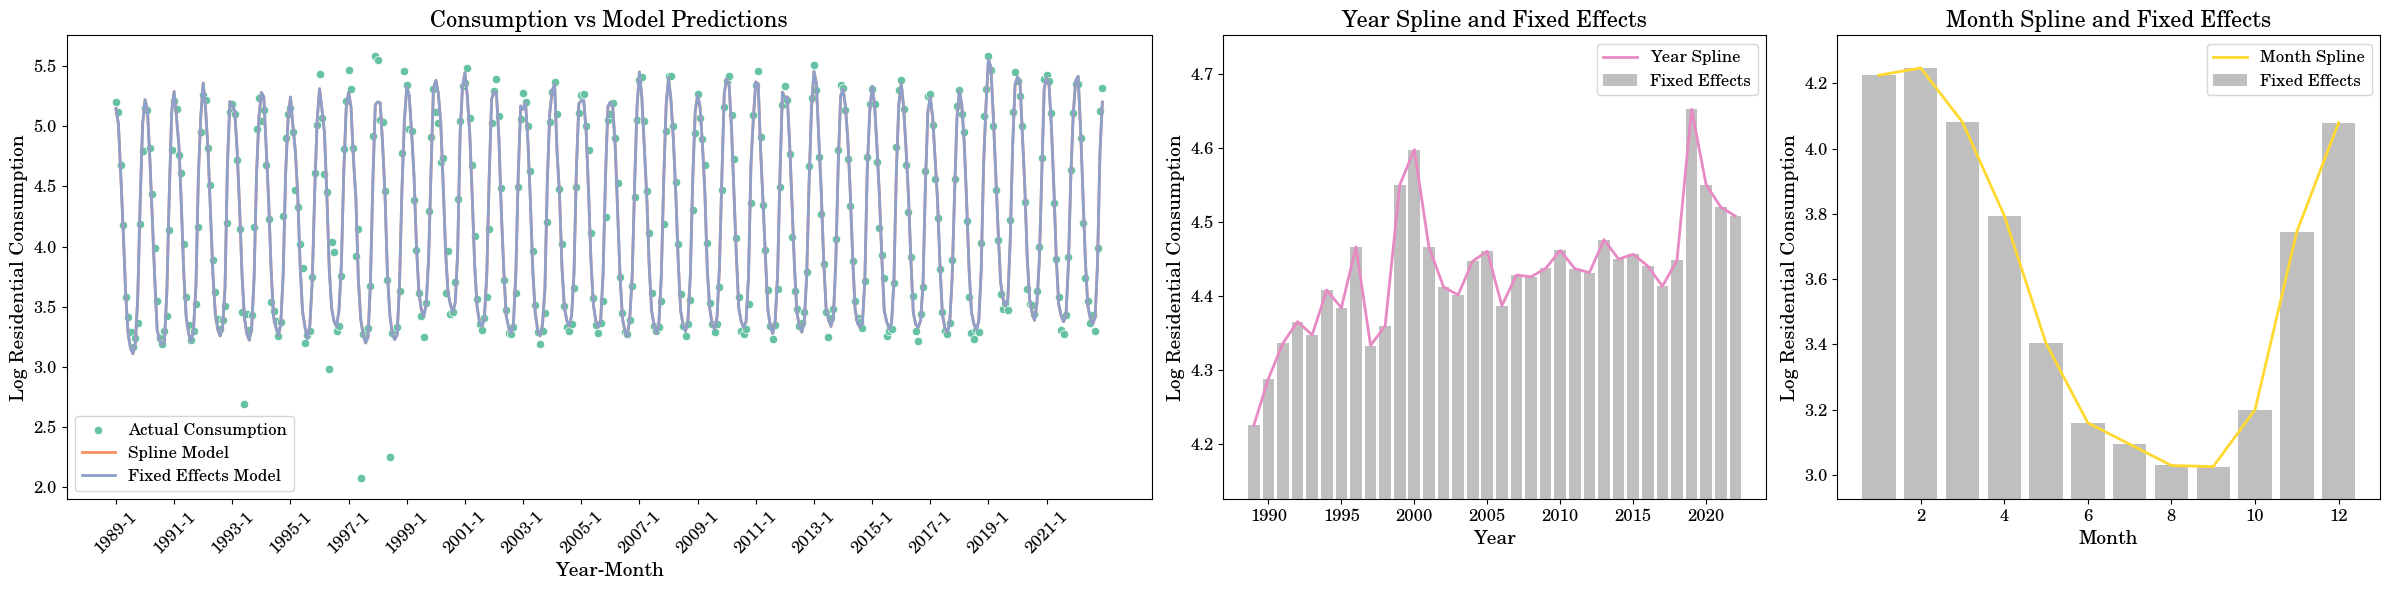

In [16]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import re

# Set font and color palette for the plots
mpl.rcParams['font.family'] = 'C059'  # Set the font family for the plots
palette = sns.color_palette("Set2")  # Set a color palette for the plots

# Extract the intercept (base category) from the fixed effects regression model (reg_FE)
intercept = reg_FE.params['Intercept']

# Extract year and month effects from the fixed effects regression model (reg_FE)
# Use regular expressions to capture the year and month numbers from parameter names
year_effects = {int(re.search(r'\d+', k).group()): v for k, v in reg_FE.params.items() if k.startswith('C(year)')}
month_effects = {int(re.search(r'\d+', k).group()): v for k, v in reg_FE.params.items() if k.startswith('C(month)')}

# Manually set the base category (intercept) as year 0 and month 1 for the effects
base_year = 1989
base_month = 1  
year_effects[base_year] = 0  
month_effects[base_month] = 0  

# Create a temporary DataFrame with year, month, and HDD_20 for further processing
df_temp = df_NM[['HDD_20', 'year', 'month']]
df_year = df_temp.copy()

# Generate spline basis columns for 'year' and 'month' using the 'create_ns_basis' function
df_year, year_year_cols = create_ns_basis(df_year, 'year', 34)
df_year, year_month_cols = create_ns_basis(df_year, 'month', 12)

# Set 'HDD_20' to 0 and filter for January data
df_year[['HDD_20']] = 0
df_year = df_year[df_year['month'] == 1]

# Drop duplicates and sort the data by year
df_year = df_year.drop_duplicates().sort_values('year').reset_index(drop=True)

# Create another temporary DataFrame for processing month effects
df_month = df_temp.copy()

# Generate spline basis columns for 'year' and 'month' for the month effect analysis
df_month, month_year_cols = create_ns_basis(df_month, 'year', 34)
df_month, month_month_cols = create_ns_basis(df_month, 'month', 12)

# Set 'HDD_20' to 0 and filter for the base year (1989)
df_month[['HDD_20']] = 0
df_month = df_month[df_month['year'] == 1989]

# Drop duplicates and sort the data by month
df_month = df_month.drop_duplicates().sort_values('month').reset_index(drop=True)

# Get predictions from the spline model for both year and month
df_year['log_preds'] = reg_splines.predict(df_year)
df_month['log_preds'] = reg_splines.predict(df_month)

# Create DataFrames for fixed effect values for both year and month
df_year_FE = pd.DataFrame({'year': list(year_effects.keys()), 'FE_value': [intercept + v for v in year_effects.values()]})
df_month_FE = pd.DataFrame({'month': list(month_effects.keys()), 'FE_value': [intercept + v for v in month_effects.values()]})

# Compute y-axis limits for the plots, centered around the spline predictions
year_min, year_max = df_year['log_preds'].min(), df_year['log_preds'].max()
month_min, month_max = df_month['log_preds'].min(), df_month['log_preds'].max()

year_fe_min, year_fe_max = df_year_FE['FE_value'].min(), df_year_FE['FE_value'].max()
month_fe_min, month_fe_max = df_month_FE['FE_value'].min(), df_month_FE['FE_value'].max()

year_y_min = min(year_min, year_fe_min) - 0.1
year_y_max = max(year_max, year_fe_max) + 0.1
month_y_min = min(month_min, month_fe_min) - 0.1
month_y_max = max(month_max, month_fe_max) + 0.1

# Modify the figure layout: Create a 1x3 subplot with custom width ratios
fig, axes = plt.subplots(1, 3, figsize=(24, 6), gridspec_kw={'width_ratios': [2, 1, 1]})

# Create a new column in df_NM for year-month combination (used for x-axis)
df_NM['year_month'] = df_NM['year'].astype(str) + '-' + df_NM['month'].astype(str)

# Left plot: Actual consumption vs model predictions
# Scatter plot for actual consumption vs. model predictions (spline and fixed effects models)
sns.scatterplot(x=df_NM['year_month'], y=df_NM['log_residential'], ax=axes[0], color=palette[0], label='Actual Consumption')
axes[0].plot(df_NM['year_month'], reg_splines.fittedvalues, color=palette[1], label='Spline Model', linewidth=2)
axes[0].plot(df_NM['year_month'], reg_FE.fittedvalues, color=palette[2], label='Fixed Effects Model', linewidth=2)

# Set plot title, labels, and legend
axes[0].set_title('Consumption vs Model Predictions', fontsize=16)
axes[0].set_xlabel('Year-Month', fontsize=14)
axes[0].set_ylabel('Log Residential Consumption', fontsize=14)
axes[0].legend(fontsize=12)

# Format x-axis to show every other year (adjust as needed for spacing)
axes[0].set_xticks(df_NM['year_month'][::24])  
axes[0].tick_params(axis='x', labelrotation=45, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Middle plot: Year spline with fixed effects
# Plot year spline and overlay fixed effects (year-wise)
axes[1].plot(df_year['year'], df_year['log_preds'], label='Year Spline', color=palette[3], linewidth=2)
axes[1].bar(df_year_FE['year'], df_year_FE['FE_value'], color='gray', alpha=0.5, label='Fixed Effects')

# Set y-axis limits and plot titles/labels
axes[1].set_ylim(year_y_min, year_y_max)
axes[1].set_title('Year Spline and Fixed Effects', fontsize=16)
axes[1].set_xlabel('Year', fontsize=14)
axes[1].set_ylabel('Log Residential Consumption', fontsize=14)
axes[1].legend(fontsize=12)
axes[1].tick_params(axis='both', labelsize=12)

# Right plot: Month spline with fixed effects
# Plot month spline and overlay fixed effects (month-wise)
axes[2].plot(df_month['month'], df_month['log_preds'], label='Month Spline', color=palette[5], linewidth=2)
axes[2].bar(df_month_FE['month'], df_month_FE['FE_value'], color='gray', alpha=0.5, label='Fixed Effects')

# Set y-axis limits and plot titles/labels
axes[2].set_ylim(month_y_min, month_y_max)
axes[2].set_title('Month Spline and Fixed Effects', fontsize=16)
axes[2].set_xlabel('Month', fontsize=14)
axes[2].set_ylabel('Log Residential Consumption', fontsize=14)
axes[2].legend(fontsize=12)
axes[2].tick_params(axis='both', labelsize=12)

# Adjust layout to prevent overlapping and ensure all elements are visible
plt.tight_layout()
plt.show()


### Now lets explore the final version of the above workflow
- Having developed the logic, we can create a streamlined workflow that can be run via the CLI or as a batch job
- Be careful with the versions of your programming languages and packages, as differences between versions can lead to unexpected behavior, compatibility issues, or deprecated features. Always check and specify the versions of key dependencies in your environment to ensure reproducibility.

### A digression on multiprocessing 